# Missing value treatment

1. Identify missing values
2. Dropping missing values
3. Different ways to fill missing values

### 1. Identify Missing Values

In [3]:
import pandas as pd

Depending on datatype representation could be different in pandas for missing value.

- When u have missing values among numbers it will be identified as 'NaN' -Not a Number.
- When u have missing values among strings it will appear as None itself.


In [4]:
data = pd.Series([1, 2, None, 4, 5, 6])
data

0    1.0
1    2.0
2    NaN
3    4.0
4    5.0
5    6.0
dtype: float64

In [5]:
data.iloc[2]

nan

In [6]:
pd.isnull(data.iloc[1])

False

In [7]:
pd.isnull(data.iloc[2])

True

In [8]:
pd.isnull(data)

0    False
1    False
2     True
3    False
4    False
5    False
dtype: bool

In [9]:
data.isna()

0    False
1    False
2     True
3    False
4    False
5    False
dtype: bool

In [10]:
# sum() on boolean values will internally convert true to 1 and false to 0 to identify num
# of missing values in pd series.
data.isna().sum()

1

In [11]:
# To get % of missing value
# data.shape[0] will give total num of rows in data

data.isna().sum() / data.shape[0] * 100

16.666666666666664

**Pandas Dataframe with one string and 1 numerical column**

- In string column city, missing value appears as None.
- In Numerical column sales, missing value appears as NaN.

In [13]:
df = pd.DataFrame({
    'city': ['a', None, 'c', 'd', 'e', 'f'],
    'sales': [1, 2, 3, 4, 5, None]
})
df

,city,sales
0,a,1.0
1,None,2.0
2,c,3.0
3,d,4.0
4,e,5.0
5,f,NaN


In [14]:
df['city'].isna()

0    False
1     True
2    False
3    False
4    False
5    False
Name: city, dtype: bool

In [16]:
df.isna()

,city,sales
0,False,False
1,True,False
2,False,False
3,False,False
4,False,False
5,False,True


In [17]:
df.isna().sum()

city     1
sales    1
dtype: int64

In [18]:
# To get % of missing value

df.isna().sum() / df.shape[0] * 100

city     16.666667
sales    16.666667
dtype: float64

### 2. Dropping missing values

- If even 1 missing value in any row, that row will be completely ignored.
- When u cannot drop values, in those cases u will have to go for filling missing values using e.g. mean, mode etc. 

In [19]:
df.dropna()

,city,sales
0,a,1.0
2,c,3.0
3,d,4.0
4,e,5.0


### 3. Filling missing values
- Fill using constant (zero, average, mode)
- Fill using forward or backward fill

In [20]:
import pandas as pd
df = pd.DataFrame({
    'city': ['BNG', 'MUM', 'CHE', 'COC', 'DEL', 'PUN', 'COI', 'HYD'],
    'sales': [1, 2, 3, 4, 5, None, 6, 8],
    'category': ['A', 'B', 'A', None, 'C', 'B', 'A', 'C'] 
})
df

,city,sales,category
0,BNG,1.0,A
1,MUM,2.0,B
2,CHE,3.0,A
3,COC,4.0,None
4,DEL,5.0,C
5,PUN,NaN,B
6,COI,6.0,A
7,HYD,8.0,C


In [21]:
df['sales_fill_zero'] = df['sales'].fillna(0)
df

,city,sales,category,sales_fill_zero
0,BNG,1.0,A,1.0
1,MUM,2.0,B,2.0
2,CHE,3.0,A,3.0
3,COC,4.0,None,4.0
4,DEL,5.0,C,5.0
5,PUN,NaN,B,0.0
6,COI,6.0,A,6.0
7,HYD,8.0,C,8.0


In [22]:
avg_sales = df['sales'].mean()
df['sales_fill_avg'] = df['sales'].fillna(avg_sales)
df

,city,sales,category,sales_fill_zero,sales_fill_avg
0,BNG,1.0,A,1.0,1.000000
1,MUM,2.0,B,2.0,2.000000
2,CHE,3.0,A,3.0,3.000000
3,COC,4.0,None,4.0,4.000000
4,DEL,5.0,C,5.0,5.000000
5,PUN,NaN,B,0.0,4.142857
6,COI,6.0,A,6.0,6.000000
7,HYD,8.0,C,8.0,8.000000


**Note**

- Forward fill missing value treatment is advised when u have **time series data** however when u have transaction data it is not advised cz previous cell might be for some other city or state.
- F.fill will take previous value while backward fill will take next available value.

In [23]:
df['sales_ffill'] = df['sales'].fillna(method='ffill')
df

,city,sales,category,sales_fill_zero,sales_fill_avg,sales_ffill
0,BNG,1.0,A,1.0,1.000000,1.0
1,MUM,2.0,B,2.0,2.000000,2.0
2,CHE,3.0,A,3.0,3.000000,3.0
3,COC,4.0,None,4.0,4.000000,4.0
4,DEL,5.0,C,5.0,5.000000,5.0
5,PUN,NaN,B,0.0,4.142857,5.0
6,COI,6.0,A,6.0,6.000000,6.0
7,HYD,8.0,C,8.0,8.000000,8.0


In [24]:
df['sales_bfill'] = df['sales'].fillna(method='bfill')
df

,city,sales,category,sales_fill_zero,sales_fill_avg,sales_ffill,sales_bfill
0,BNG,1.0,A,1.0,1.000000,1.0,1.0
1,MUM,2.0,B,2.0,2.000000,2.0,2.0
2,CHE,3.0,A,3.0,3.000000,3.0,3.0
3,COC,4.0,None,4.0,4.000000,4.0,4.0
4,DEL,5.0,C,5.0,5.000000,5.0,5.0
5,PUN,NaN,B,0.0,4.142857,5.0,6.0
6,COI,6.0,A,6.0,6.000000,6.0,6.0
7,HYD,8.0,C,8.0,8.000000,8.0,8.0


**For categorical variables we generally use mode i.e. most frequently occuring category to replace null value**

In [22]:
df['category']

0       A
1       B
2       A
3    None
4       C
5       B
6       A
7       C
Name: category, dtype: object

In [26]:
df['category'].mode()

0    A
dtype: object

In [28]:
df['category'].mode()[0]  # just take 1st o/p cz sometimes there might be multiple modes.

'A'

In [29]:
df['category_fill'] = df['category'].fillna(df['category'].mode()[0])
df

,city,sales,category,sales_fill_zero,sales_fill_avg,sales_ffill,sales_bfill,category_fill
0,BNG,1.0,A,1.0,1.000000,1.0,1.0,A
1,MUM,2.0,B,2.0,2.000000,2.0,2.0,B
2,CHE,3.0,A,3.0,3.000000,3.0,3.0,A
3,COC,4.0,None,4.0,4.000000,4.0,4.0,A
4,DEL,5.0,C,5.0,5.000000,5.0,5.0,C
5,PUN,NaN,B,0.0,4.142857,5.0,6.0,B
6,COI,6.0,A,6.0,6.000000,6.0,6.0,A
7,HYD,8.0,C,8.0,8.000000,8.0,8.0,C


## Fill missing values based on data type-

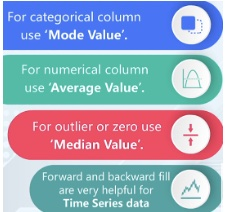